In [1]:
import import_ipynb
from Environments import Boxworld_DP
from Environments import run_experiments
from Environments import run_single_exp
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

# First define a namedtuple to hold useful information for actions
Action = namedtuple('Action', 'name index delta_i delta_j' )
up = Action('up', 0, -1, 0)    
down = Action('down', 1, 1, 0)    
left = Action('left', 2, 0, -1)    
right = Action('right', 3, 0, 1) 

# Use a dictionary to convert indices to actions using the index as a key
# Useful for sampling actions for a given state
index_to_actions = {}
for action in [up, down, left, right]:
    index_to_actions[action.index] = action 
    
# Helpful function to convert action in string format to the action object
str_to_actions = {}
for action in [up,down,left,right]:
    str_to_actions[action.name] = action

importing Jupyter notebook from Environments.ipynb
X X X X X X X 
X E . B . E X 
X . . . . A X 
X . . . . . X 
X . . . . . X 
X E . . . ! X 
X X X X X X X 

Reward =  -1  : done =  False  : push =  False
X X X X X X X 
X E . B . A X 
X . . . . . X 
X . . . . . X 
X . . . . . X 
X E . . . ! X 
X X X X X X X 

X X X X X X X 
X E . . . E X 
X . . A . . X 
X B . . . . X 
X . . . . . X 
X E . . . ! X 
X X X X X X X 

up
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0. -6. -6. -6. -6. -6.  0.]
 [ 0. -1. -1. -1. -1. -1.  0.]
 [ 0. -1. -1. -1. -1. -1.  0.]
 [ 0.  1. -1. -1. -1. -1.  0.]
 [ 0. -1. -1. -1. -1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
down
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1. -1. -1. -1. -1.  0.]
 [ 0.  1. -1. -1. -1. -1.  0.]
 [ 0. -1. -1. -1. -1. -1.  0.]
 [ 0. -1. -1. -1. -1. -1.  0.]
 [ 0. -6. -6. -6. -6. -6.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
left
[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.  -6.  -1.  -1.  -1.  -1.   0.]
 [  0.  -6.  -1.  -1.  -1.  -1.   0.]
 [  0.  -6. -10.  -1.

In [2]:
class Policy():
    
    def __init__(self,environment,gamma):
        self.env = environment
        self.size_env= environment.size
        self.reward_matrix = environment.reward_matrix
        self.transition_matrix = environment.transition_matrix
        self.coord_to_index = environment.coord_to_index
        self.index_pairs_to_state = environment.index_pairs_to_state
        self.size_state_space = environment.size**4
        
        # Initialize policy to be a random one
        self.probability_actions = np.ones((self.size_state_space, 4))*0.25 
        
        # We initialize the values to 0
        self.values = np.zeros( self.size_state_space )   
        
        # Discount factor
        self.gamma = gamma
     
    # Function which samples an action, given a state
    def __call__(self,state):
        
        # Find the probabilities of actions for the given state
        prob_actions = self.probability_actions[state]
        
        # Randomly sample index from this
        index = np.random.choice(np.arange(prob_actions.size))
        return index_to_actions[index].name
    
    

    
    # Function that uses a given policy to evaluate the value functions for each state
    def iterative_policy_evaluation(self,n_sweeps):
        
        # Reset the values
        self.values = np.zeros(self.size_state_space)
        
        # Then use bellman expectation equation to iteratively update values
        for n in range(n_sweeps):
            
            self.values = np.sum(self.probability_actions * (self.reward_matrix + 
                                 self.gamma* np.dot(self.transition_matrix,self.values)), axis=1 )
            
    # ** Need to pass env in order to get current coordinates of box (in init would only get starting coords...)        
    def display_values(self,env):
        
        value_matrix = np.zeros( (self.size_env,self.size_env) )
        
        # Get index of box coordinates
        box_index = self.coord_to_index[env.position_box[0],env.position_box[1]]
            
        for i in range(1, self.size_env-1):
                for j in range(1, self.size_env-1):

                    agent_index = self.coord_to_index[i,j]
                    state = self.index_pairs_to_state[box_index,agent_index]
                    value_matrix[i,j] = self.values[state]
                        
        return value_matrix
    
    def greedy_improvement(self):
        
        # Get indices of 'best' actions
        argmax_actions = np.argmax(self.reward_matrix + self.gamma * np.dot(self.transition_matrix,self.values), axis=1 )
        
        #Then update policy for each state
        for state in range(self.size_state_space):
            
            greedy_index = argmax_actions[state]
            
            #But only update if this transition is possible!
            if self.transition_matrix[state][greedy_index].sum()!=0:
                
                self.probability_actions[state,:] = 0
                self.probability_actions[state,greedy_index] = 1
                
            
    
    #A function that iteratively evaluates and improves a policy 
    def policy_iteration(self, n_evaluations):
        
        self.iterative_policy_evaluation(n_evaluations)
        self.greedy_improvement()

# Tests


In [3]:
class Policy():
    
    def __init__(self,environment,gamma):
        self.env = environment
        self.size_env= environment.size
        self.reward_matrix = environment.reward_matrix
        self.transition_matrix = environment.transition_matrix
        self.coord_to_index = environment.coord_to_index
        self.index_pairs_to_state = environment.index_pairs_to_state
        self.size_state_space = environment.size**4
        
        # Initialize policy to be a random one
        self.probability_actions = np.ones((self.size_state_space, 4))*0.25 
        
        # We initialize the values to 0
        self.values = np.zeros( self.size_state_space )   
        
        # Discount factor
        self.gamma = gamma
     
    # Function which samples an action, given a state
    def __call__(self,state):
        
        # Find the probabilities of actions for the given state
        prob_actions = self.probability_actions[state]
        
        # Randomly sample index from this
        index = np.random.choice(np.arange(prob_actions.size))
        return index_to_actions[index].name
    
    
    # Function that uses a given policy to evaluate the value functions for each state
    def iterative_policy_evaluation(self,n_sweeps):
        
        # Reset the values
        self.values = np.zeros(self.size_state_space)
        
        # Then use bellman expectation equation to iteratively update values
        for n in range(n_sweeps):
            
            self.values = np.sum(self.probability_actions * (self.reward_matrix + 
                                 self.gamma* np.dot(self.transition_matrix,self.values)), axis=1 )
            
    # ** Need to pass env in order to get current coordinates of box (in init would only get starting coords...)        
    def display_values(self,env):
        
        value_matrix = np.zeros( (self.size_env,self.size_env) )
        
        # Get index of box coordinates
        box_index = self.coord_to_index[env.position_box[0],env.position_box[1]]
            
        for i in range(1, self.size_env-1):
                for j in range(1, self.size_env-1):

                    agent_index = self.coord_to_index[i,j]
                    state = self.index_pairs_to_state[box_index,agent_index]
                    value_matrix[i,j] = self.values[state]
                        
        return value_matrix
    
    def greedy_improvement(self):
        
        # Get indices of 'best' actions
        argmax_actions = np.argmax(self.reward_matrix + self.gamma * np.dot(self.transition_matrix,self.values), axis=1 )
        
        #Then update policy for each state
        for state in range(self.size_state_space):
            
            greedy_index = argmax_actions[state]
            
            #But only update if this transition is possible!
            if self.transition_matrix[state][greedy_index].sum()!=0:
                
                self.probability_actions[state,:] = 0
                self.probability_actions[state,greedy_index] = 1
                
            
    
    #A function that iteratively evaluates and improves a policy 
    def policy_iteration(self, n_evaluations):
        
        self.iterative_policy_evaluation(n_evaluations)
        self.greedy_improvement()

# Example


X X X X X X X 
X ! B . . E X 
X . . . . . X 
X . . . . . X 
X . . . . . X 
X E . A . E X 
X X X X X X X 



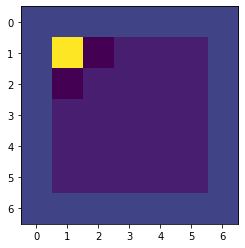

up
[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.  -6.  -6.  -6.  -6.  -6.   0.]
 [  0.  -1. -10.  -1.  -1.  -1.   0.]
 [  0.  -1.  -1.  -1.  -1.  -1.   0.]
 [  0.  -1.  -1.  -1.  -1.  -1.   0.]
 [  0.  -1.  -1.  -1.  -1.  -1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]]
down
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1. -1. -1. -1. -1.  0.]
 [ 0. -1. -1. -1. -1. -1.  0.]
 [ 0. -1. -1. -1. -1. -1.  0.]
 [ 0. -1. -1. -1. -1. -1.  0.]
 [ 0. -6. -6. -6. -6. -6.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
left
[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.  -6.  -1. -48.  -1.  -1.   0.]
 [  0.  -6.  -1.  -1.  -1.  -1.   0.]
 [  0.  -6.  -1.  -1.  -1.  -1.   0.]
 [  0.  -6.  -1.  -1.  -1.  -1.   0.]
 [  0.  -6.  -1.  -1.  -1.  -1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]]
right
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -1. -1. -1. -6.  0.]
 [ 0. -1. -1. -1. -1. -6.  0.]
 [ 0. -1. -1. -1. -1. -6.  0.]
 [ 0. -1. -1. -1. -1. -6.  0.]
 [ 0. -1. -1. -1. -1. -6.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [4]:
boxworld = Boxworld_DP(7)
boxworld.reset()
policy = Policy(boxworld,gamma=0.4)

# Apply a single greedy improvement, after 25 sweeps
for i in range(25):
    values = policy.iterative_policy_evaluation(10)
    policy.greedy_improvement()

boxworld.display()
vals = policy.display_values(boxworld)

plt.imshow( (vals - vals.min())/(vals.max() - vals.min()) )
plt.show()

boxworld.print_reward_matrices()

In [6]:
run_experiments(boxworld,policy,10)

([-269, -258, -3078, -660, -2504, -4507, -483, -129, -1660, -266],
 -129,
 -1381.4,
 1436.1511201819953)

# Improving the Policy 

In [7]:
boxworld = Boxworld_DP(7)
# Expect a high gamma to be better, as agent needs to be farsighted in an environment like this
gamma = 0.4

policy = Policy(boxworld,gamma)

# Let's now see how our agent does after repeatedly improving the policy
for n_improvements in range(20):
    
    values = policy.policy_iteration(n_evaluations=20)
    
    _, max_reward, mean_reward, var_reward = run_experiments(boxworld, policy, number_exp=20)
    
    print(n_improvements, mean_reward)



0 -1162.9
Time limit expired!
1 -1153.55
2 -638.55
Time limit expired!
3 -1067.15
4 -504.55
5 -432.25
6 -845.8
7 -472.2
8 -802.45
9 -766.25
10 -1000.65
Time limit expired!
11 -851.3
12 -899.3
13 -970.5
14 -1335.95
15 -806.9
16 -657.95
Time limit expired!
17 -1052.9
Time limit expired!
18 -1013.85
19 -1014.0


# Plots

Time limit expired!


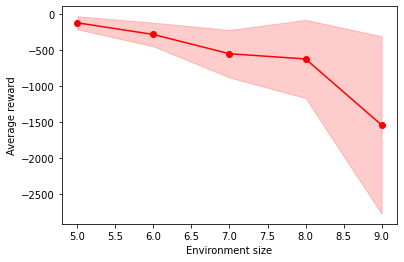

In [8]:
n_environments_per_size=5
n_runs_per_environments=5
gamma = 0.9

mean_reward = []
std_reward = []
    
for size_envir in range(5,10):

    # heuristics
    n_improvement_steps = size_envir
    n_steps_policy_eval = 10
    
    total_rewards = []

    for n_envir in range(n_environments_per_size):

        boxworld = Boxworld_DP(size_envir)
        policy = Policy(boxworld, gamma)
        
        for n_improvements in range(n_improvement_steps):
    
            policy.policy_iteration(n_steps_policy_eval)

        all_total_rewards, _, _, _ = run_experiments(boxworld, policy, n_runs_per_environments)

        total_rewards += all_total_rewards

    mean_reward.append( np.mean(total_rewards) )
    std_reward.append( np.std(total_rewards) )

mean_reward = np.asarray(mean_reward)
std_reward = np.asarray(std_reward)

plt.plot(range(5, 10), mean_reward, 'or')
plt.plot(range(5, 10), mean_reward, color = 'r')
plt.fill_between(range(5, 10), mean_reward - std_reward/2, mean_reward + std_reward/2,
             color='r', alpha=0.2)

plt.xlabel('Environment size')
plt.ylabel('Average reward')

plt.show()